# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

# Import dataset

In [2]:
df = pd.read_csv('Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Description

- **PassengerId**: Unique ID given to each passenger
- **Survived**: Survival (0 = No, 1 = Yes)
- **Pclass**: Passenger class (1 = 1st, 2 = 2nd, 3 = 3rd)
- **Name**: Name of the passenger
- **Sex**: Sex of the passenger
- **Age**: Age of the passenger
- **SibSp**: Number of Siblings/Spouse aboard
- **Parch**: Number of Parent/Child aboard
- **Ticket**: Ticket number
- **Fare**: Passenger fare (Bristish Pound)
- **Cabin**: Cabin alloted to the passenger
- **Embarked**: Passenger from which port (S: Southampton, C: Cherbourg, Q: Queenstown)

# EDA

In [3]:
df.shape

(891, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe(include = 'all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [6]:
df1 = df.copy()

## Univariate Analysis

### Survived

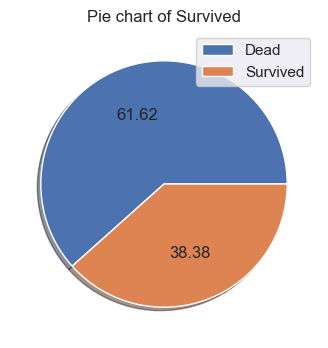

In [7]:
plt.figure(figsize = (6, 4))
plt.pie(df1['Survived'].value_counts(), autopct = '%0.2f',shadow = True)
plt.legend(['Dead', 'Survived'], loc = 'upper right')
plt.title('Pie chart of Survived');

##### Conclusion

- 61.62% of the passengers died.
- 38.38% of the passengers survived.

### Pclass

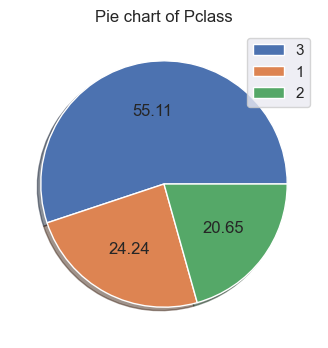

In [8]:
plt.figure(figsize = (6, 4))
plt.pie(df1['Pclass'].value_counts(), autopct = '%0.2f',shadow = True)
plt.legend((df['Pclass'].value_counts()*100/len(df)).index, loc = 'upper right')
plt.title('Pie chart of Pclass')
plt.show()

##### Conclusion

- 55.11% belong to PClass 3.
- 24.24% belong to PClass 1.
- 20.65% belong to PClass 2.

### Sex

In [9]:
df1['Sex'].value_counts()*100/len(df)

Sex
male      64.758698
female    35.241302
Name: count, dtype: float64

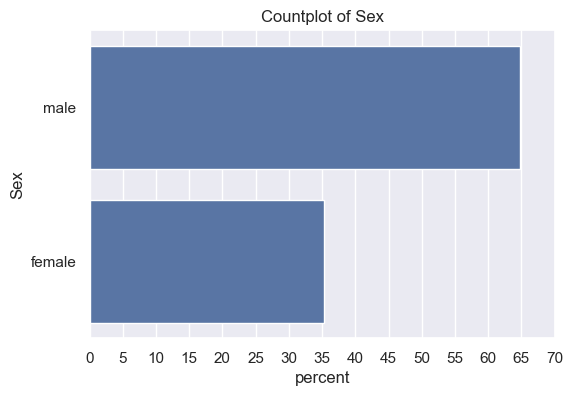

In [10]:
plt.figure(figsize = (6, 4))
sns.countplot(df1['Sex'], stat = 'percent')
plt.title('Countplot of Sex')
plt.xticks(np.arange(0, 71, 5))
plt.show()

##### Conclusion

- 64.75% of the passengers are males.
- 35.24% of the passengers are females.

### Age

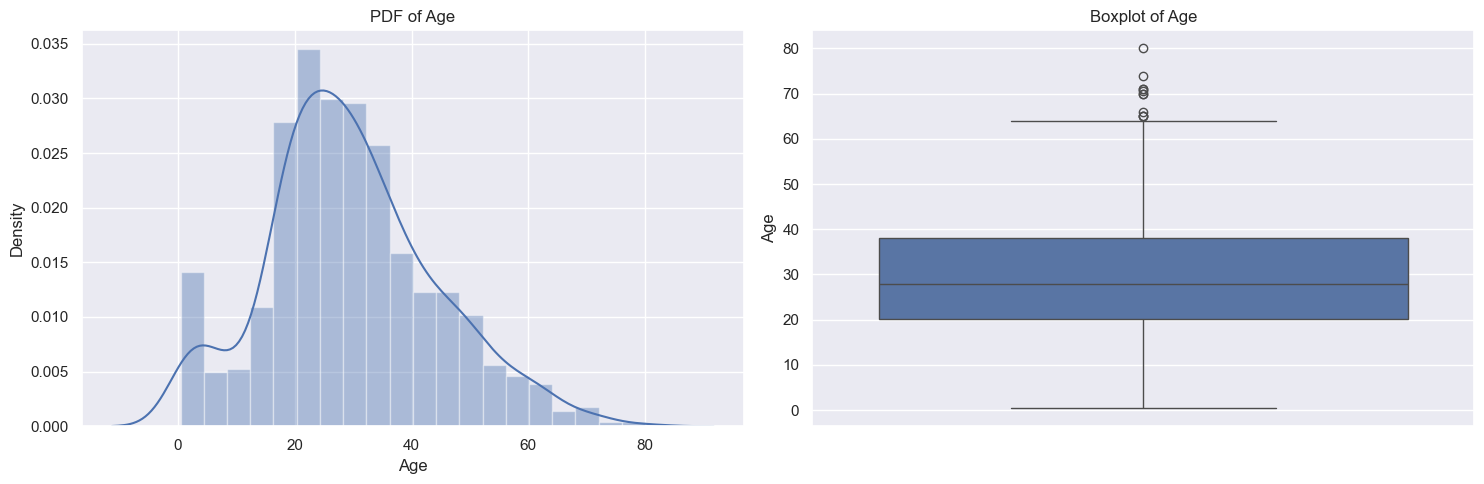

In [11]:
fig, ax = plt.subplots(1, 2, figsize = (15, 5))
ax = ax.flatten()

sns.distplot(df1['Age'], ax = ax[0])
ax[0].set_title('PDF of Age')

sns.boxplot(df1['Age'], ax = ax[1])
ax[1].set_title('Boxplot of Age')

plt.tight_layout()
plt.show()

In [12]:
df1['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [13]:
df1['Age'].skew()

np.float64(0.38910778230082704)

##### Conclusion

- 29 is the mean age of the passengers.
- The `Age` column is slightly positively skewed. 

### SibSp

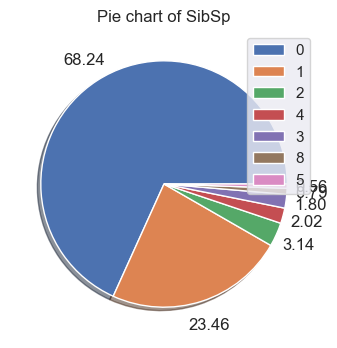

In [14]:
plt.figure(figsize = (6, 4))
plt.pie(df1['SibSp'].value_counts(), autopct = '%0.2f', pctdistance = 1.2, shadow = True)
plt.legend((df1['SibSp'].value_counts()).index, loc = 'upper right')
plt.title('Pie chart of SibSp')
plt.show()

##### Conclusion

- 68.24% of the passengers travelled alone.
- 23.46% of the passengers travelled with 1 Sibling/Spouse.
- The rest 8.3% travelled with 2 or more Siblings/Spouse.

### Parch

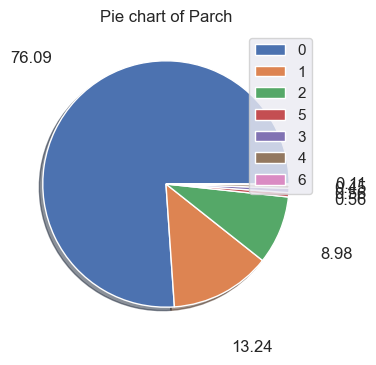

In [15]:
plt.figure(figsize = (6, 4))
plt.pie(df1['Parch'].value_counts(), autopct = '%0.2f', pctdistance = 1.5, shadow = True)
plt.legend((df1['Parch'].value_counts()).index, loc = 'upper right')
plt.title('Pie chart of Parch')
plt.show()

##### Conclusion

- 76.09% of the passengers didn't accompany anyone.
- 13.24% accompanied 1 Parent/Child.
- The rest 10.66% accompanied 2 and more Parent/Child.

### Fare

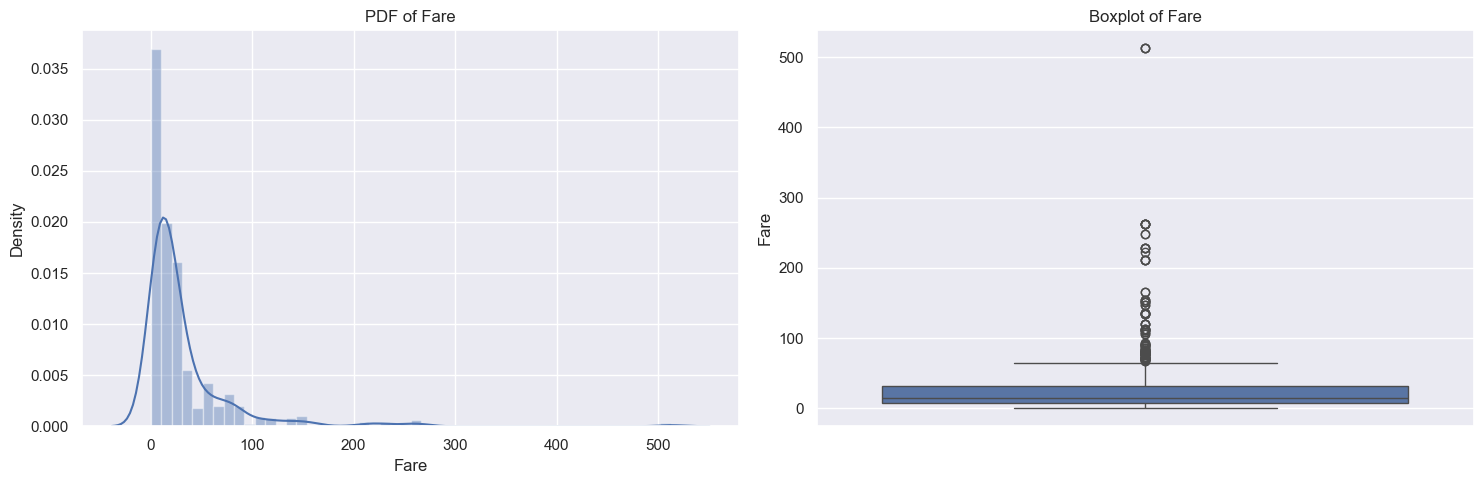

In [16]:
fig, ax = plt.subplots(1, 2, figsize = (15, 5))
ax = ax.flatten()

sns.distplot(df1['Fare'], ax = ax[0])
ax[0].set_title('PDF of Fare')

sns.boxplot(df1['Fare'], ax = ax[1])
ax[1].set_title('Boxplot of Fare')

plt.tight_layout()
plt.show()

In [17]:
df1['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [18]:
# Percentage of passengers with 0 fare
np.round(len(df1[df1['Fare'] == 0])*100/len(df1), 2)

np.float64(1.68)

In [19]:
df1[df1['Fare'] > 500]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


In [20]:
df1[df1['Fare'] == 0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S


In [21]:
df1['Fare'].skew()

np.float64(4.787316519674893)

##### Conclusion

- The `Fare` column is highly positively skewed.
- The average fare is 32.2.

### Embarked

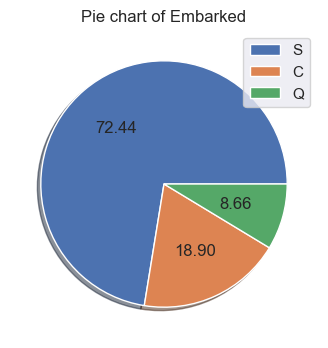

In [22]:
plt.figure(figsize = (6, 4))
plt.pie(df1['Embarked'].value_counts(), autopct = '%0.2f', shadow = True)
plt.legend((df1['Embarked'].value_counts()).index)
plt.title('Pie chart of Embarked');

##### Conclusion

- 72.44% passengers boarded at Southampton.
- 18.90% passengers boarded at Cherbourg.
- 8.66% passengers boarded at Queenstown.

## Bivariate Analysis

### Survived

#### Survived - Pclass

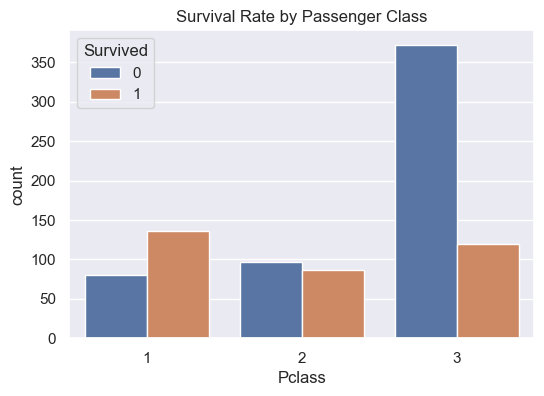

In [23]:
plt.figure(figsize = (6, 4))
sns.countplot(x = 'Pclass', hue = 'Survived', data = df)
plt.title('Survival Rate by Passenger Class')
plt.show()

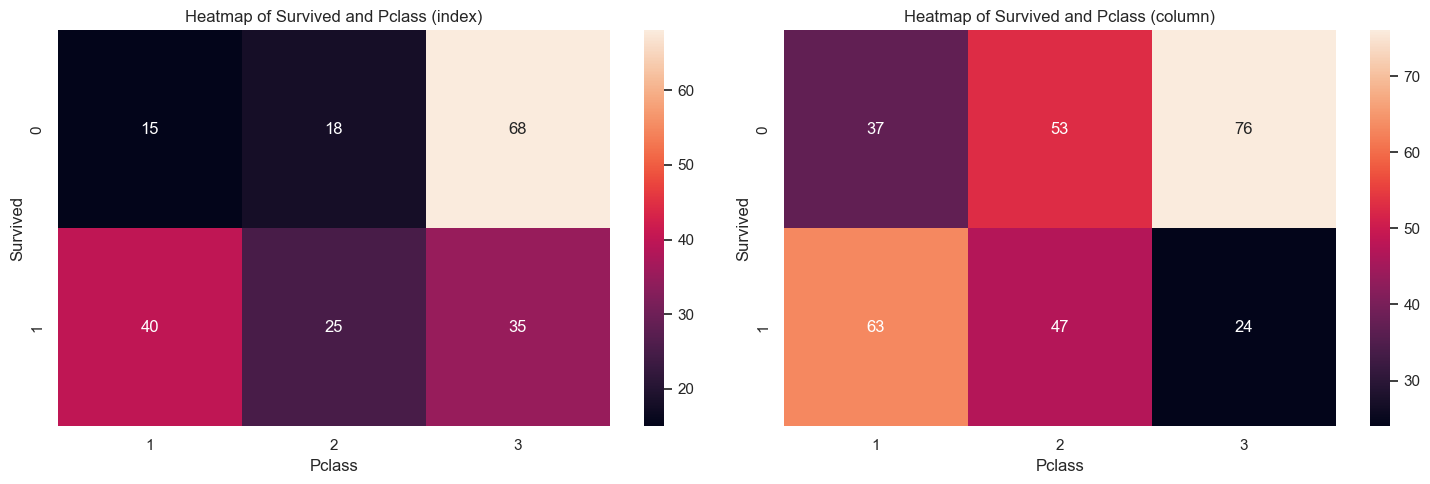

In [24]:
fig, ax = plt.subplots(1, 2, figsize = (15, 5))
ax = ax.flatten()

sns.heatmap((pd.crosstab(df1['Survived'], df1['Pclass'], normalize = 'index')*100).round(), annot = True, ax = ax[0])
ax[0].set_title('Heatmap of Survived and Pclass (index)')

sns.heatmap((pd.crosstab(df1['Survived'], df1['Pclass'], normalize = 'columns')*100).round(), annot = True, ax = ax[1])
ax[1].set_title('Heatmap of Survived and Pclass (column)')

plt.tight_layout()
plt.show()

##### Conclusion

- Highest number of deaths have occured in Pclass 3 compared to other Pclass.
- Highest number of survivors are in Pclass 1 compared to other Pclass.
- **Pclass 1**: highest number of survivors (63%).
- **Pclass 2**: almost equal number of survivors.
- **Pclass 3**: highest number of passengers who couldn't survive (76%).

#### Survived - Sex

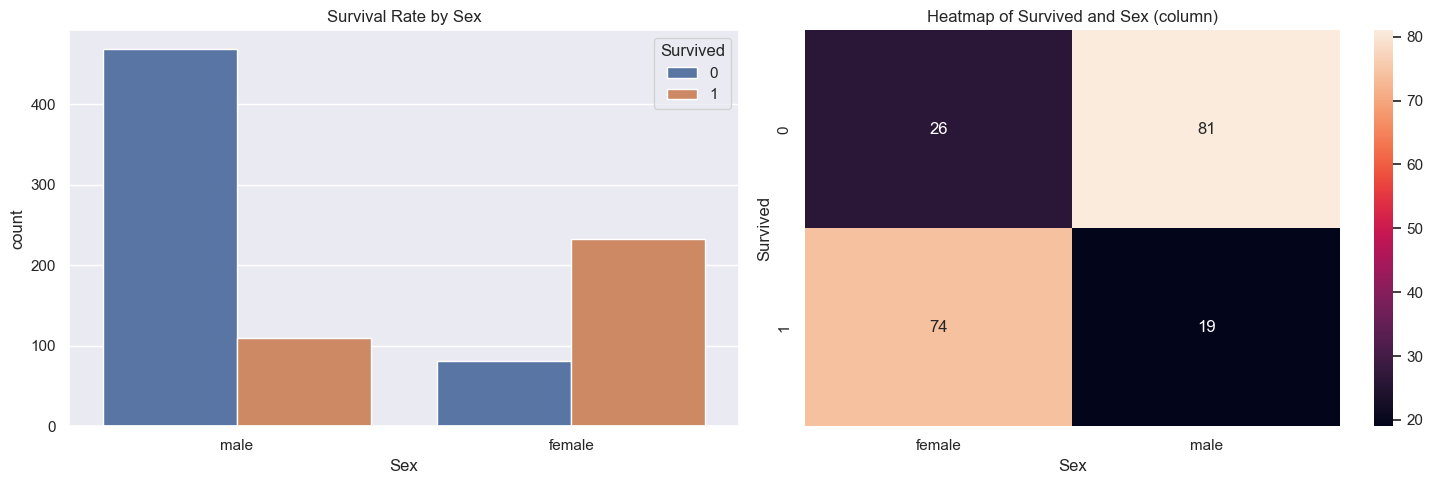

In [25]:
fig, ax = plt.subplots(1, 2, figsize = (15, 5))
ax = ax.flatten()

sns.countplot(x = 'Sex', hue = 'Survived', data = df, ax = ax[0])
ax[0].set_title('Survival Rate by Sex')

sns.heatmap((pd.crosstab(df1['Survived'], df1['Sex'], normalize = 'columns')*100).round(), annot = True, ax = ax[1])
ax[1].set_title('Heatmap of Survived and Sex (column)')

plt.tight_layout()
plt.show()

##### Conclusions

- Higher number of female survivors can be observed.

#### Survived - Age

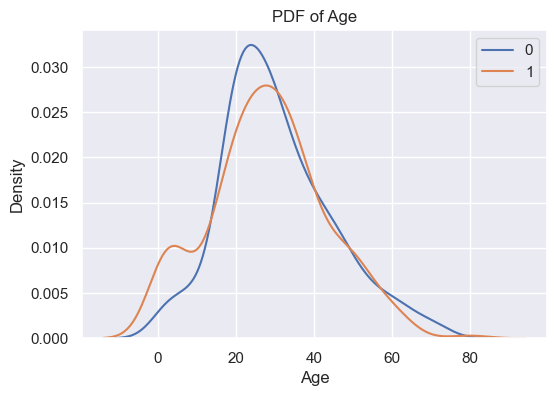

In [26]:
plt.figure(figsize = (6, 4))
sns.distplot(df1[df1['Survived'] == 0]['Age'], hist = False)
sns.distplot(df1[df1['Survived'] == 1]['Age'], hist = False)
plt.title('PDF of Age')
plt.legend([0, 1])
plt.show()

In [27]:
np.round(df1[df1['Survived'] == 0]['Age'].mean(), 2)

np.float64(30.63)

In [28]:
np.round(df1[df1['Survived'] == 1]['Age'].mean(), 2)

np.float64(28.34)

In [29]:
np.round(df1[(df1['Age'] > 0) & (df1['Age'] <= 20)]['Survived'].mean(), 2)

np.float64(0.46)

In [30]:
np.round(df1[(df1['Age'] > 21) & (df1['Age'] <= 40)]['Survived'].mean(), 2)

np.float64(0.41)

In [31]:
np.round(df1[(df1['Age'] > 41) & (df1['Age'] <= 60)]['Survived'].mean(), 2)

np.float64(0.4)

In [32]:
np.round(df1[(df1['Age'] > 61) & (df1['Age'] <= 80)]['Survived'].mean(), 2)

np.float64(0.26)

##### Conclusion

- The average age of passengers who survived is 28 years.
- The average age of passengers who couldn't survive is 30 years.
- Average survival rate of age group 0-20 is 46%.
- Average survival rate of age group 21-40 is 37%.
- Average survival rate of age group 41-60 is 40%.
- Average survival rate of age group 61-80 is 26%.

#### Survived - SibSp

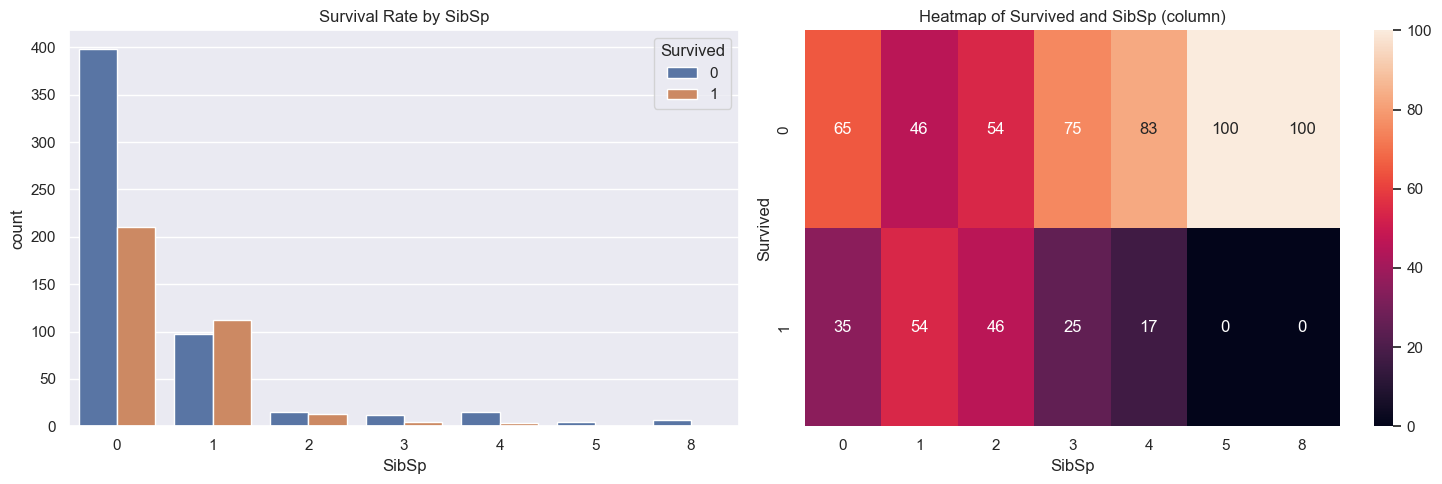

In [33]:
fig, ax = plt.subplots(1, 2, figsize = (15, 5))
ax = ax.flatten()

sns.countplot(x = 'SibSp', hue = 'Survived', data = df, ax = ax[0])
ax[0].set_title('Survival Rate by SibSp')

sns.heatmap((pd.crosstab(df1['Survived'], df1['SibSp'], normalize = 'columns')*100).round(), annot = True, fmt = '0.0f', ax = ax[1])
ax[1].set_title('Heatmap of Survived and SibSp (column)')

plt.tight_layout()
plt.show()

##### Conclusion

- Survival rate of passengers without Siblings/Spouse is 37%.
- As the number of Sibling/Spouse increases from 1, the survival rate decreases.

#### Survived - Parch

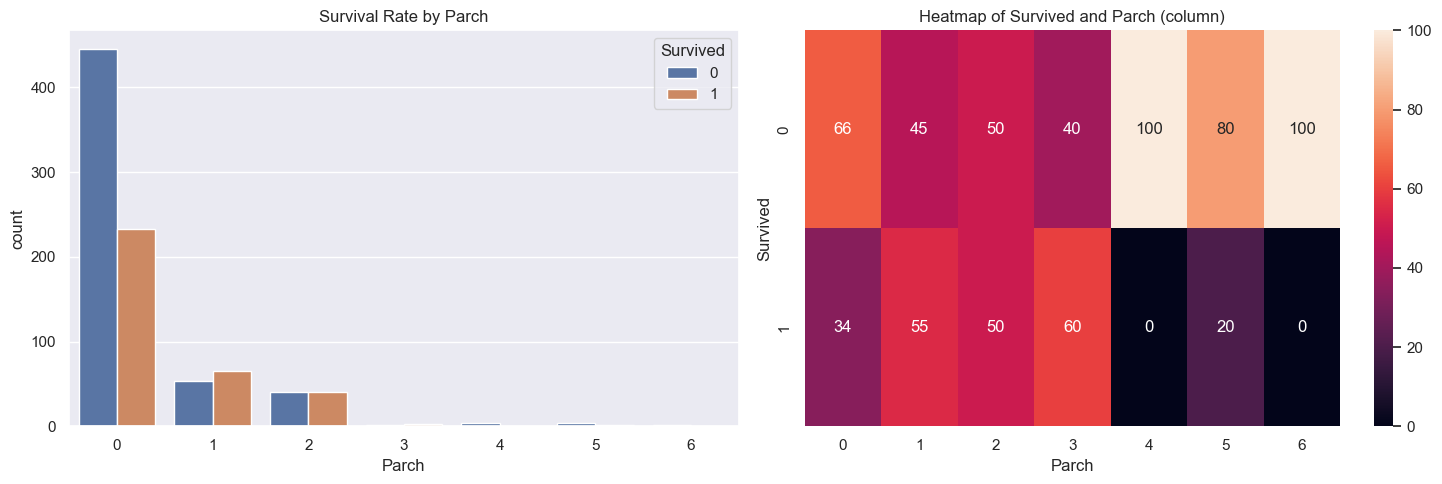

In [34]:
fig, ax = plt.subplots(1, 2, figsize = (15, 5))
ax = ax.flatten()

sns.countplot(x = 'Parch', hue = 'Survived', data = df, ax = ax[0])
ax[0].set_title('Survival Rate by Parch')

sns.heatmap((pd.crosstab(df1['Survived'], df1['Parch'], normalize = 'columns')*100).round(), annot = True, fmt = '0.0f', ax = ax[1])
ax[1].set_title('Heatmap of Survived and Parch (column)')

plt.tight_layout()
plt.show()

##### Conclusion

- Survival rate of passengers with no Parent/Child is 35%.
- Survival rate of passengers with Parent/Child between 1 and 3 remains almost same (average = 57%).
- Survival rate of passengers with Parent/Child between 4 and 6 is significantly low.

#### Survived - Fare

In [35]:
df1[df1['Survived'] == 0]['Fare'].mean()

np.float64(22.117886885245902)

In [36]:
df1[df1['Survived'] == 1]['Fare'].mean()

np.float64(48.39540760233918)

##### Conclusion

- Passengers who survived paid a higher average fare price

#### Survived - Embarked

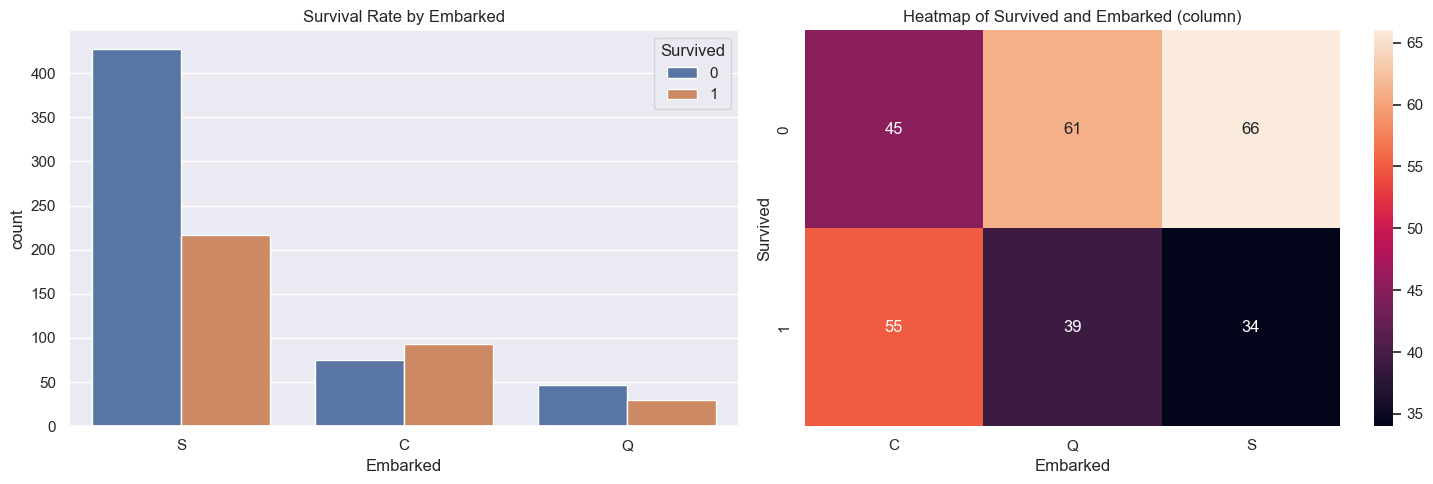

In [37]:
fig, ax = plt.subplots(1, 2, figsize = (15, 5))
ax = ax.flatten()

sns.countplot(x = 'Embarked', hue = 'Survived', data = df, ax = ax[0])
ax[0].set_title('Survival Rate by Embarked')

sns.heatmap((pd.crosstab(df1['Survived'], df1['Embarked'], normalize = 'columns')*100).round(), annot = True, fmt = '0.0f', ax = ax[1])
ax[1].set_title('Heatmap of Survived and Embarked (column)')

plt.tight_layout()
plt.show()

##### Conclusion

- Survival rate: Cherbourg > Southampton > Queenstown.

### Pclass

#### Pclass - Sex

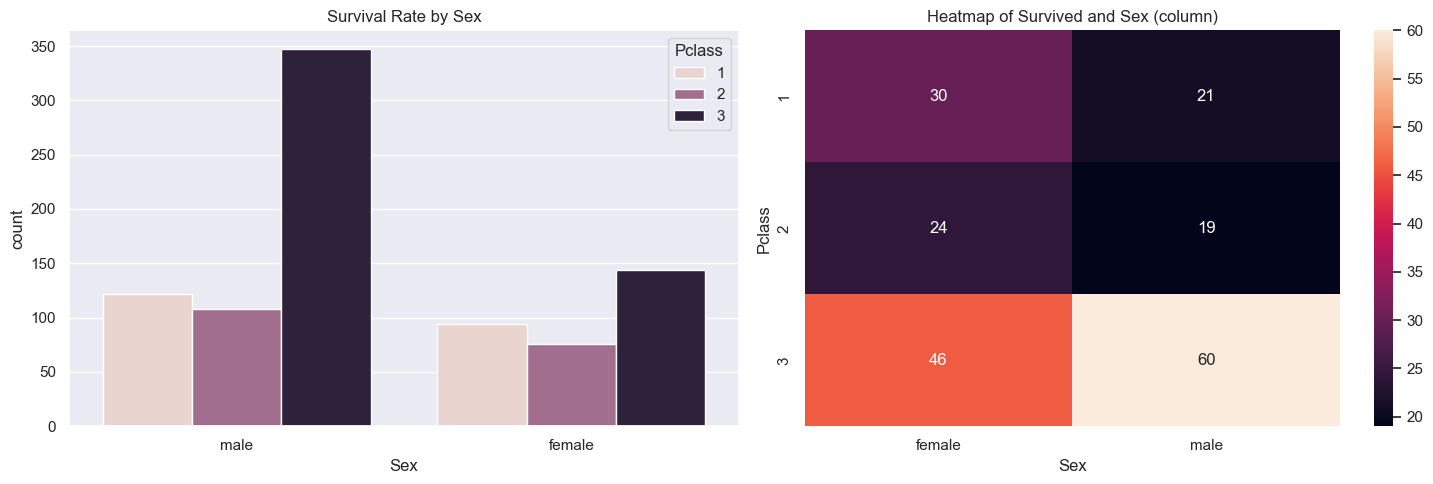

In [38]:
fig, ax = plt.subplots(1, 2, figsize = (15, 5))
ax = ax.flatten()

sns.countplot(x = 'Sex', hue = 'Pclass', data = df, ax = ax[0])
ax[0].set_title('Survival Rate by Sex')

sns.heatmap((pd.crosstab(df1['Pclass'], df1['Sex'], normalize = 'columns')*100).round(), annot = True, fmt = '0.0f', ax = ax[1])
ax[1].set_title('Heatmap of Survived and Sex (column)')

plt.tight_layout()
plt.show()

##### Conclusion

- In Pclass 1 and 2 out of the total passengers majority are females.
- In Pclass 3 out of the total passengers majority are males.

#### Pclass - Age

In [39]:
for i in range(1, 4):
    print(f'Average Age of passengers in Pclass {i}: {np.round(df1[df1['Pclass'] == i]['Age'].mean(), 2)}')

Average Age of passengers in Pclass 1: 38.23
Average Age of passengers in Pclass 2: 29.88
Average Age of passengers in Pclass 3: 25.14


##### Conclusion

- Average age of passengers in Pclass 1: 38.11
- Average age of passengers in Pclass 2: 29.88
- Average age of passengers in Pclass 3: 25.14

#### Pclass - SibSp

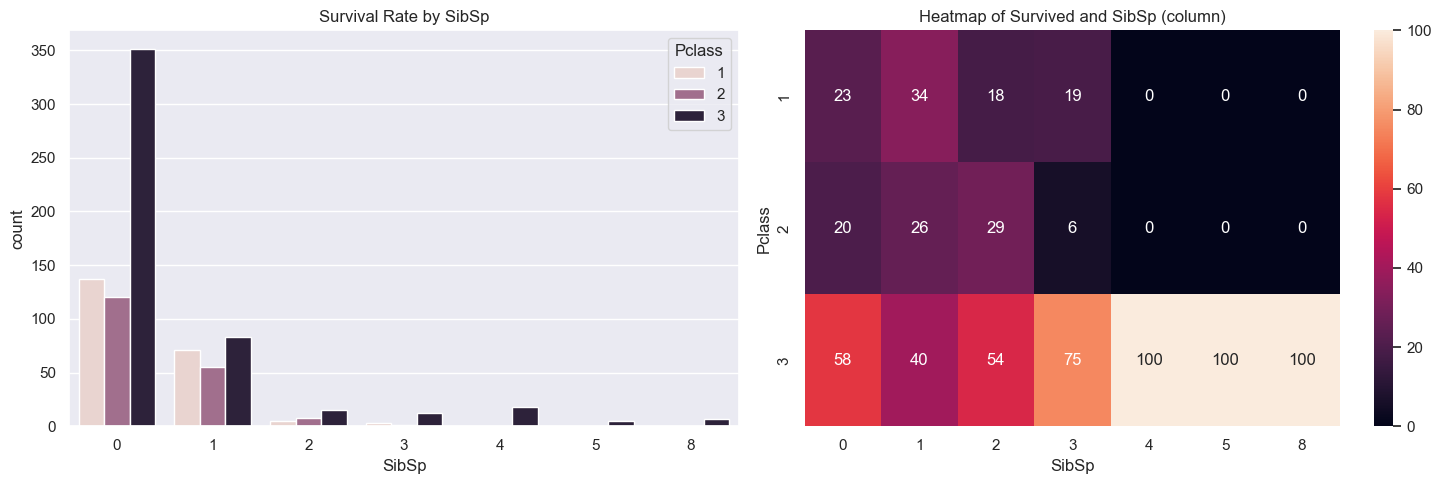

In [40]:
fig, ax = plt.subplots(1, 2, figsize = (15, 5))
ax = ax.flatten()

sns.countplot(x = 'SibSp', hue = 'Pclass', data = df, ax = ax[0])
ax[0].set_title('Survival Rate by SibSp')

sns.heatmap((pd.crosstab(df1['Pclass'], df1['SibSp'], normalize = 'columns')*100).round(), annot = True, fmt = '0.0f', ax = ax[1])
ax[1].set_title('Heatmap of Survived and SibSp (column)')

plt.tight_layout()
plt.show()

##### Conclusion

- In Pclass 3 as the number of Sibling/Spouse increases, the proportion of passengers also increasea.
- In Pclass 1 and 2 as the number of Sibling/Spouse increases, the proportion of passengers decreases.

#### Pclass - Parch

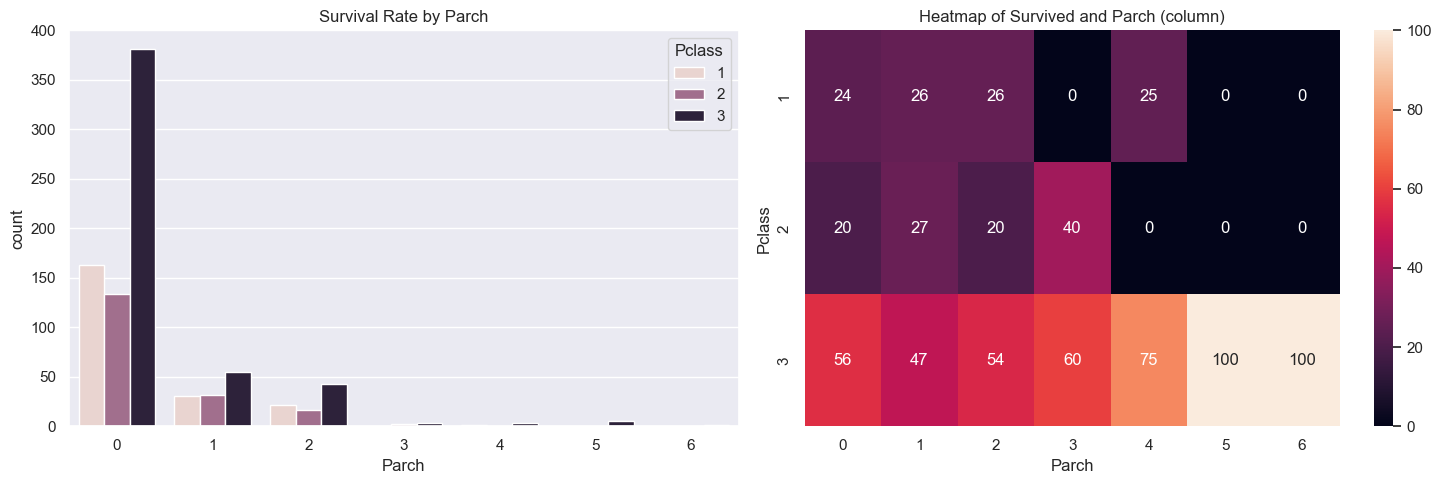

In [41]:
fig, ax = plt.subplots(1, 2, figsize = (15, 5))
ax = ax.flatten()

sns.countplot(x = 'Parch', hue = 'Pclass', data = df, ax = ax[0])
ax[0].set_title('Survival Rate by Parch')

sns.heatmap((pd.crosstab(df1['Pclass'], df1['Parch'], normalize = 'columns')*100).round(), annot = True, fmt = '0.0f', ax = ax[1])
ax[1].set_title('Heatmap of Survived and Parch (column)')

plt.tight_layout()
plt.show()

##### Conclusion

- In Pclass 3 as the number of Parent/Child increases, the proportion of passengers also increases.
- In Pclass 1 and 2 as the number of Parent/Child increases, the proportion of passengers decreases.

#### Pclass - Fare

In [42]:
for i in range(1, 4):
    print(f'Average fare paid by passengers for Pclass {i}: {np.round(df1[df1['Pclass'] == i]['Fare'].mean(), 2)}')

Average fare paid by passengers for Pclass 1: 84.15
Average fare paid by passengers for Pclass 2: 20.66
Average fare paid by passengers for Pclass 3: 13.68


##### Conclusion

- Average fare paid by passengers for Pclass 1: 84.15
- Average fare paid by passengers for Pclass 2: 20.66
- Average fare paid by passengers for Pclass 3: 13.68

$\therefore$  Average fare of Pclass 1 > Average fare of Pclass 2 > Average fare of Pclass 3

#### Pclass - Embarked

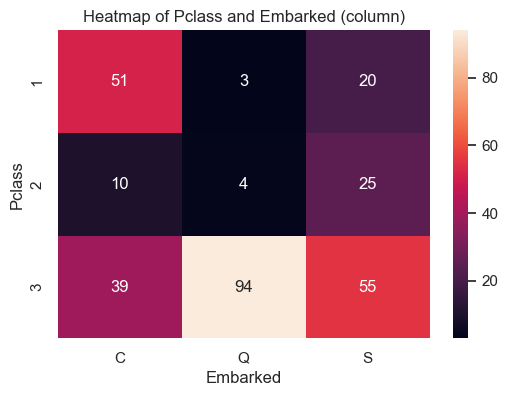

In [43]:
plt.figure(figsize = (6, 4))
sns.heatmap((pd.crosstab(df1['Pclass'], df1['Embarked'], normalize = 'columns')*100).round(), annot = True, fmt = '0.0f')
plt.title('Heatmap of Pclass and Embarked (column)')
plt.show()

In [44]:
for i in ['S', 'Q', 'C']:
    for j in range(1, 4):
        print(f'Embarked: {i}, Pclass: {j}', end = ' => ')
        print(f'{df1[(df1['Embarked'] == i) & (df1['Pclass'] == j)].count()[0]}')
    print()

Embarked: S, Pclass: 1 => 127
Embarked: S, Pclass: 2 => 164
Embarked: S, Pclass: 3 => 353

Embarked: Q, Pclass: 1 => 2
Embarked: Q, Pclass: 2 => 3
Embarked: Q, Pclass: 3 => 72

Embarked: C, Pclass: 1 => 85
Embarked: C, Pclass: 2 => 17
Embarked: C, Pclass: 3 => 66



##### Conclusion

- Out of all the passengers majority of them baorded at Southampton.
- At Cherbourg majority boarded Pclass 1.
- At Queenstown and Southampton majority boarded Pclass 3.

### Sex

#### Sex - Age

In [45]:
for i in ['male', 'female']:
    print(f'Average age of {i}: {np.round(df1[df1['Sex'] == i]['Age'].mean(), 2)}')

Average age of male: 30.73
Average age of female: 27.92


##### Conclusion

- Average age of male: 30.73
- Average age of female: 27.92

#### Sex - Fare

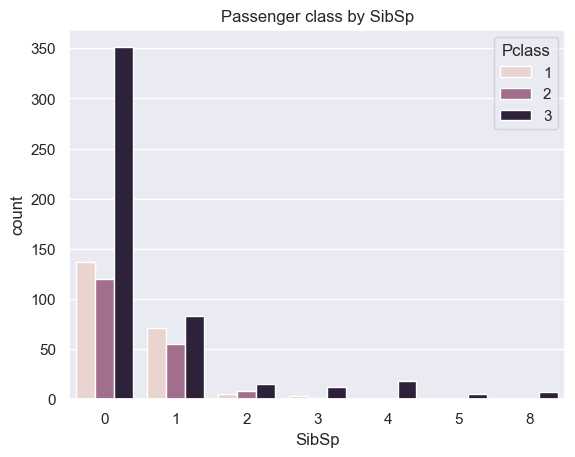

In [46]:
sns.countplot(x = 'SibSp', hue = 'Pclass', data = df)
plt.title('Passenger class by SibSp')
plt.show()

In [47]:
for i in ['male', 'female']:
    print(f'Average fare of {i}: {np.round(df1[df1['Sex'] == i]['Fare'].mean(), 2)}')

Average fare of male: 25.52
Average fare of female: 44.48


##### Conclusion

- Average fare of male: 25.52
- Average fare of female: 44.48

### Fare

#### Fare - Embarked

In [48]:
df1[df1['Fare'] == 0][['Embarked', 'Fare']].value_counts()

Embarked  Fare
S         0.0     15
Name: count, dtype: int64

In [49]:
np.round(df1[df1['Embarked'] == 'S']['Fare'].mean(), 2)

np.float64(27.08)

In [50]:
np.round(df1[df1['Embarked'] == 'Q']['Fare'].mean(), 2)

np.float64(13.28)

In [51]:
np.round(df1[df1['Embarked'] == 'C']['Fare'].mean(), 2)

np.float64(59.95)

##### Conclusion

- 15 passengers who boarded from Southampton have not paid any fare (i.e. `Fare` = 0)
- Average fare of passengers who boarded from Southampton is 27.08.
- Average fare of passengers who boarded from Queenstown is 13.28.
- Average fare of passengers who boarded from Cherbourg is 59.95.

# Conclusion

1. **Sex of the passenger**: The sex of the passenger played a crucial role in survival. Females have a higher cahnce of survival.
2. **Fare**: Higher fares were associated with higher survival rates.
3. **Passenger Class**: Pclass 1 has more number of survivors due to the fact that the passenger paid a higher fare for a luxurious experience hence were given priority.
4. **Age**: Younger passengers had a slightly higher survival rate, while older adults had lower survival chances.
5. **Family Size**: Passengers traveling alone had a better survival rate than those in large families.

# Data Preprocessing

In [52]:
df1.duplicated().sum()

np.int64(0)

In [53]:
df1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [54]:
df1.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [55]:
df1 = df.copy()

## Age

In [56]:
df1['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

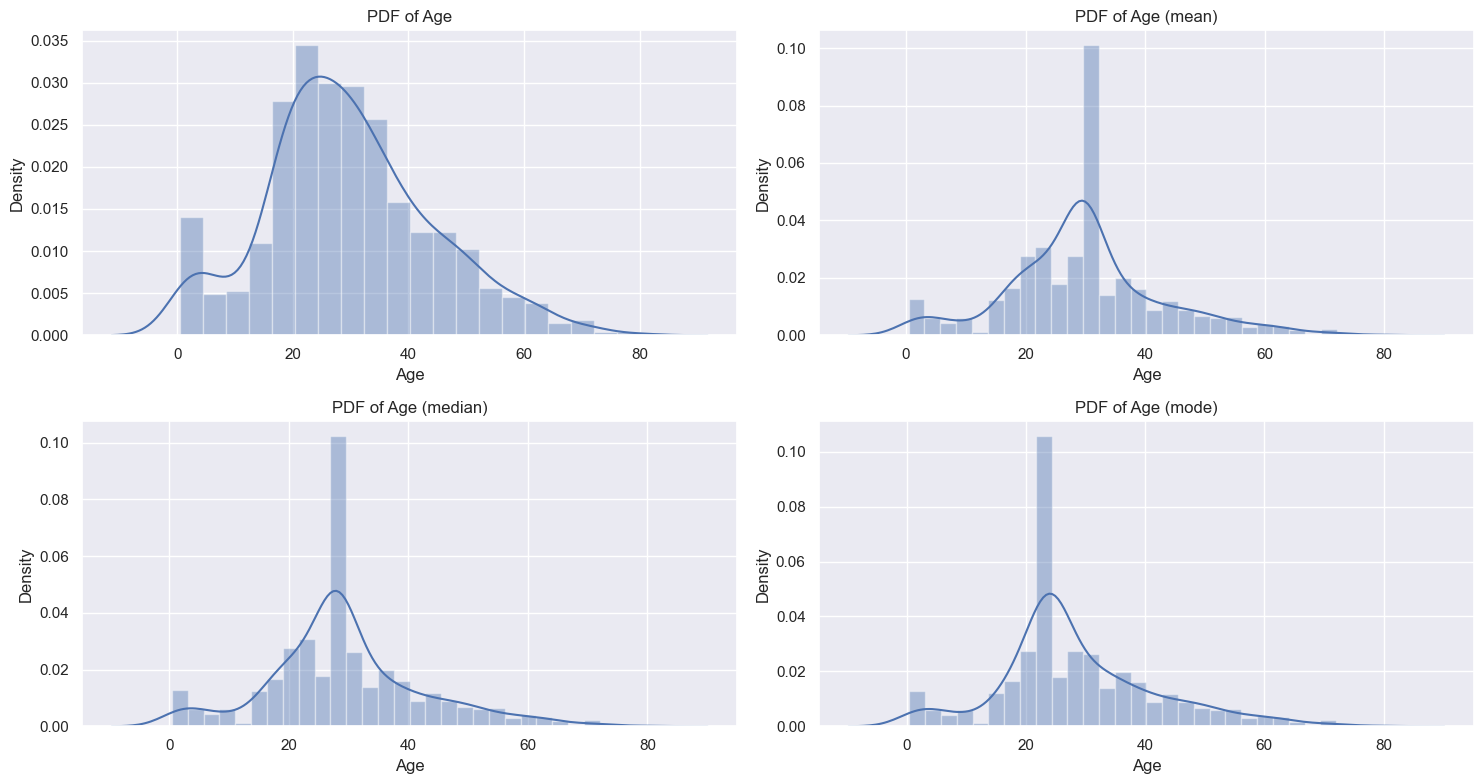

In [57]:
fig, ax = plt.subplots(2, 2, figsize = (15, 8))
ax = ax.flatten()

sns.distplot(df1['Age'], ax = ax[0])
ax[0].set_title('PDF of Age')

sns.distplot(df1['Age'].fillna(df1['Age'].mean()), ax = ax[1])
ax[1].set_title('PDF of Age (mean)')

sns.distplot(df1['Age'].fillna(df1['Age'].median()), ax = ax[2])
ax[2].set_title('PDF of Age (median)')

sns.distplot(df1['Age'].fillna(df1['Age'].mode()[0]), ax = ax[3])
ax[3].set_title('PDF of Age (mode)')

plt.tight_layout()
plt.show()

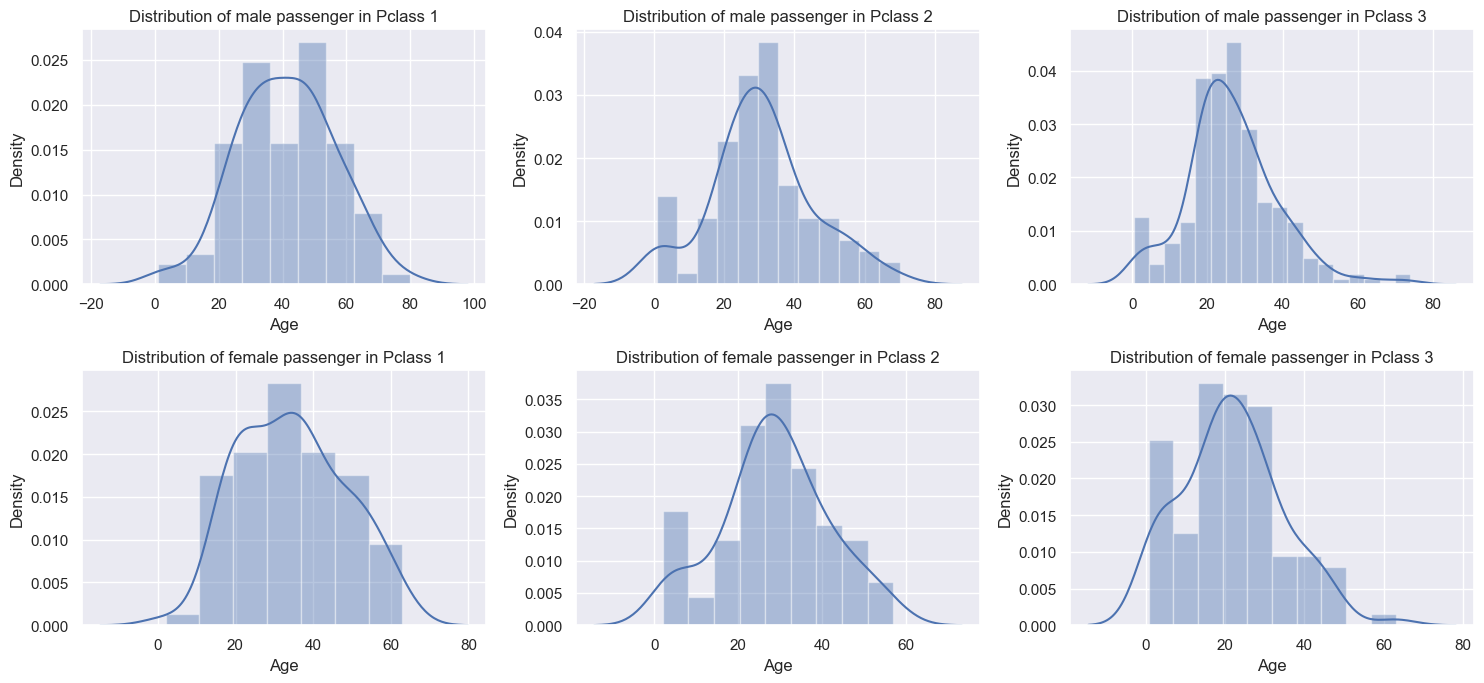

In [58]:
fig, ax = plt.subplots(2, 3, figsize = (15, 7))
ax = ax.flatten()

sns.distplot(df1[(df1['Pclass'] == 1) & (df1['Sex'] == 'male')]['Age'], ax = ax[0])
ax[0].set_title('Distribution of male passenger in Pclass 1')

sns.distplot(df1[(df1['Pclass'] == 2) & (df1['Sex'] == 'male')]['Age'], ax = ax[1])
ax[1].set_title('Distribution of male passenger in Pclass 2')

sns.distplot(df1[(df1['Pclass'] == 3) & (df1['Sex'] == 'male')]['Age'], ax = ax[2])
ax[2].set_title('Distribution of male passenger in Pclass 3')

sns.distplot(df1[(df1['Pclass'] == 1) & (df1['Sex'] == 'female')]['Age'], ax = ax[3])
ax[3].set_title('Distribution of female passenger in Pclass 1')

sns.distplot(df1[(df1['Pclass'] == 2) & (df1['Sex'] == 'female')]['Age'], ax = ax[4])
ax[4].set_title('Distribution of female passenger in Pclass 2')

sns.distplot(df1[(df1['Pclass'] == 3) & (df1['Sex'] == 'female')]['Age'], ax = ax[5])
ax[5].set_title('Distribution of female passenger in Pclass 3')

plt.tight_layout()
plt.show()

In [59]:
print('Median age of male and female passengers based on Pclass')
for i in [1, 2, 3]:
    for j in ['male', 'female']:
        print(f'Pclass: {i}, Sex: {j} => {df1[(df1['Pclass'] == i) & (df1['Sex'] == j)]['Age'].median()}')

Median age of male and female passengers based on Pclass
Pclass: 1, Sex: male => 40.0
Pclass: 1, Sex: female => 35.0
Pclass: 2, Sex: male => 30.0
Pclass: 2, Sex: female => 28.0
Pclass: 3, Sex: male => 25.0
Pclass: 3, Sex: female => 21.5


In [60]:
# Imputing nan values of age column with median of respective pclass and sex of age column
df1['Age'] = df1.groupby(['Pclass', 'Sex'])['Age'].transform(lambda x: x.fillna(x.median()))

In [61]:
df1['Age'] = df1['Age'].astype('int')

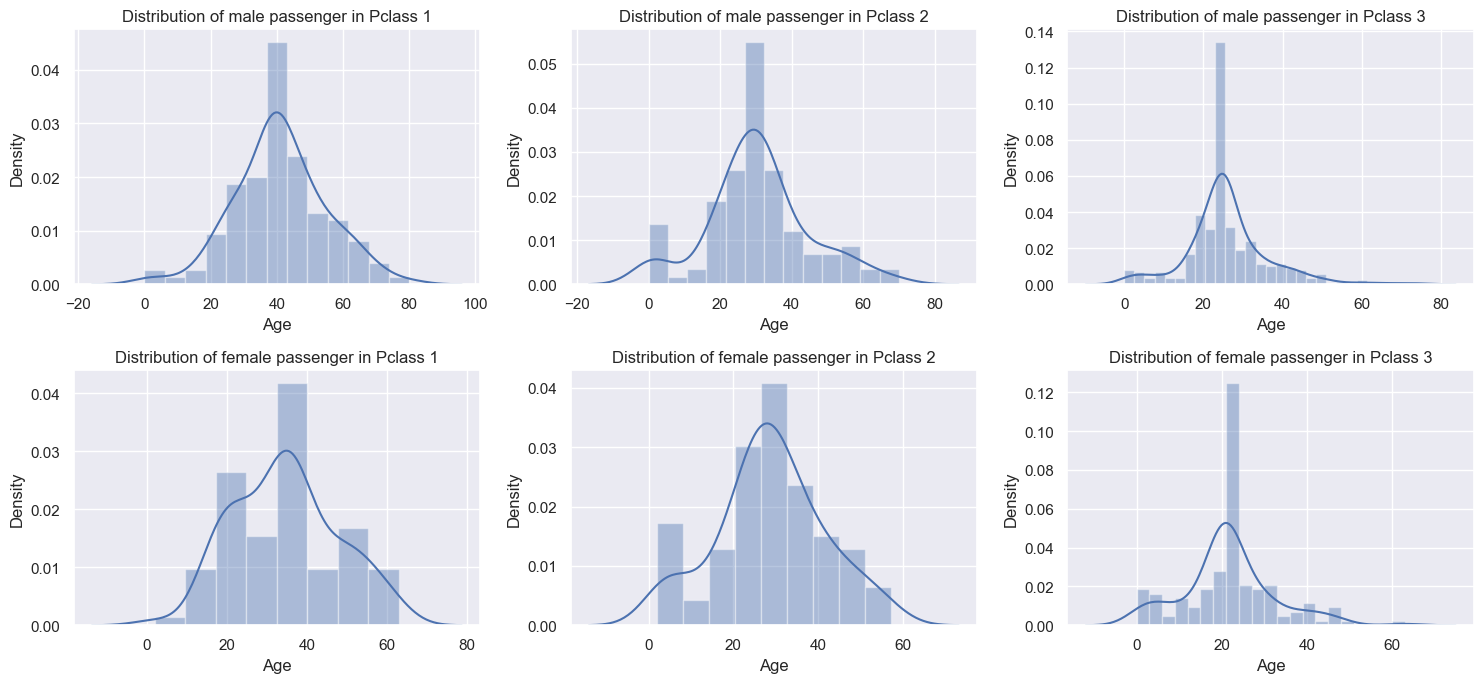

In [62]:
fig, ax = plt.subplots(2, 3, figsize = (15, 7))
ax = ax.flatten()

sns.distplot(df1[(df1['Pclass'] == 1) & (df1['Sex'] == 'male')]['Age'], ax = ax[0])
ax[0].set_title('Distribution of male passenger in Pclass 1')

sns.distplot(df1[(df1['Pclass'] == 2) & (df1['Sex'] == 'male')]['Age'], ax = ax[1])
ax[1].set_title('Distribution of male passenger in Pclass 2')

sns.distplot(df1[(df1['Pclass'] == 3) & (df1['Sex'] == 'male')]['Age'], ax = ax[2])
ax[2].set_title('Distribution of male passenger in Pclass 3')

sns.distplot(df1[(df1['Pclass'] == 1) & (df1['Sex'] == 'female')]['Age'], ax = ax[3])
ax[3].set_title('Distribution of female passenger in Pclass 1')

sns.distplot(df1[(df1['Pclass'] == 2) & (df1['Sex'] == 'female')]['Age'], ax = ax[4])
ax[4].set_title('Distribution of female passenger in Pclass 2')

sns.distplot(df1[(df1['Pclass'] == 3) & (df1['Sex'] == 'female')]['Age'], ax = ax[5])
ax[5].set_title('Distribution of female passenger in Pclass 3')

plt.tight_layout()
plt.show()

In [63]:
df1.drop(columns = ['PassengerId', 'Name', 'Ticket'], inplace = True)

In [64]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    int64  
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(1), int64(5), object(3)
memory usage: 62.8+ KB


## Embarked

In [65]:
# Embarked with null values
df1[df1['Embarked'].isnull()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
61,1,1,female,38,0,0,80.0,B28,NaN
829,1,1,female,62,0,0,80.0,B28,NaN


In [66]:
df1['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [67]:
df1['Embarked'].fillna(df1['Embarked'].mode()[0], inplace = True)

In [68]:
df1.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      0
dtype: int64

# Feature Engineering

## Family
*Family = SibSp + Parch*
-

In [69]:
df1['Family'] = df1['SibSp'] + df1['Parch'] + 1
df1.drop(columns = ['SibSp', 'Parch'], inplace = True)
df1.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Family
0,0,3,male,22,7.2500,NaN,S,2
1,1,1,female,38,71.2833,C85,C,2
2,1,3,female,26,7.9250,NaN,S,1
3,1,1,female,35,53.1000,C123,S,2
4,0,3,male,35,8.0500,NaN,S,1


## Is Alone

In [70]:
def is_alone(value):
    if value == 1:
        return 1
    else:
        return 0

In [71]:
df1['Is Alone'] = df1['Family'].apply(is_alone)

## Individual Fare
*Individual Fare* = $\frac{Fare}{Family}$
-

In [72]:
df1['Individual Fare'] = df1['Fare']/df1['Family']
df1.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Family,Is Alone,Individual Fare
0,0,3,male,22,7.2500,NaN,S,2,0,3.62500
1,1,1,female,38,71.2833,C85,C,2,0,35.64165
2,1,3,female,26,7.9250,NaN,S,1,1,7.92500
3,1,1,female,35,53.1000,C123,S,2,0,26.55000
4,0,3,male,35,8.0500,NaN,S,1,1,8.05000


In [73]:
df1['log Individual Fare'] = np.log1p(df1['Individual Fare'])

In [74]:
df1.groupby(['Pclass', 'Sex'])[['Fare', 'Individual Fare']].mean().round(2)

Fare  Individual Fare
Pclass Sex                            
1      female  106.13            65.18
       male     67.23            43.50
2      female   21.97            11.75
       male     19.74            13.37
3      female   16.12             6.87
       male     12.66             8.60

In [75]:
df1.drop(columns = ['Fare', 'Individual Fare'], inplace = True)

In [76]:
df1.head()

,Survived,Pclass,Sex,Age,Cabin,Embarked,Family,Is Alone,log Individual Fare
0,0,3,male,22,NaN,S,2,0,1.531476
1,1,1,female,38,C85,C,2,0,3.601186
2,1,3,female,26,NaN,S,1,1,2.188856
3,1,1,female,35,C123,S,2,0,3.316003
4,0,3,male,35,NaN,S,1,1,2.202765


## Cabin

In [77]:
# Null values in Cabin
df1[df1['Cabin'].isnull()]

,Survived,Pclass,Sex,Age,Cabin,Embarked,Family,Is Alone,log Individual Fare
0,0,3,male,22,NaN,S,2,0,1.531476
2,1,3,female,26,NaN,S,1,1,2.188856
4,0,3,male,35,NaN,S,1,1,2.202765
5,0,3,male,25,NaN,Q,1,1,2.246893
7,0,3,male,2,NaN,S,5,0,1.651539
...,...,...,...,...,...,...,...,...,...
884,0,3,male,25,NaN,S,1,1,2.085672
885,0,3,female,39,NaN,Q,6,0,1.767154
886,0,2,male,27,NaN,S,1,1,2.639057
888,0,3,female,21,NaN,S,4,0,1.926072


In [78]:
df1['Cabin'] = df1['Cabin'].str[0]
df1['Cabin'].fillna('U', inplace = True)

In [79]:
df1['Cabin'].value_counts()

Cabin
U    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: count, dtype: int64

In [80]:
df1.isnull().sum()

Survived               0
Pclass                 0
Sex                    0
Age                    0
Cabin                  0
Embarked               0
Family                 0
Is Alone               0
log Individual Fare    0
dtype: int64

# Splitting into dependent and independent variables

In [81]:
x = df1.drop(columns = 'Survived')
y = df1['Survived']

# Splitting into train and test sets

In [82]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

# Encoding and Scaling the data using ColumnTransformer

In [83]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
x_train['Sex'] = le.fit_transform(x_train['Sex'])
x_test['Sex'] = le.transform(x_test['Sex'])

In [84]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

In [85]:
ct = ColumnTransformer(transformers = [
    ('ohe', OneHotEncoder(sparse_output = False, drop = 'first'), ['Cabin', 'Embarked']),
    ('scaler', StandardScaler(), ['Age', 'log Individual Fare'])
], remainder = 'passthrough')

In [86]:
x_train_trf = ct.fit_transform(x_train)
x_test_trf = ct.transform(x_test)

In [87]:
print('x_train after one hot encoding')
pd.DataFrame(x_train_trf, columns = ct.get_feature_names_out()).head()

x_train after one hot encoding


,ohe__Cabin_B,ohe__Cabin_C,ohe__Cabin_D,ohe__Cabin_E,ohe__Cabin_F,ohe__Cabin_G,ohe__Cabin_T,ohe__Cabin_U,ohe__Embarked_Q,ohe__Embarked_S,scaler__Age,scaler__log Individual Fare,remainder__Pclass,remainder__Sex,remainder__Family,remainder__Is Alone
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.212740,0.958621,1.0,1.0,1.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,-0.442139,0.099003,2.0,1.0,1.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.234857,-0.420230,3.0,1.0,1.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,-0.216474,-1.105433,3.0,1.0,2.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,-1.720910,-0.985329,3.0,0.0,7.0,0.0


In [88]:
print('x_test after one hot encoding')
pd.DataFrame(x_test_trf, columns = ct.get_feature_names_out()).head()

x_test after one hot encoding


,ohe__Cabin_B,ohe__Cabin_C,ohe__Cabin_D,ohe__Cabin_E,ohe__Cabin_F,ohe__Cabin_G,ohe__Cabin_T,ohe__Cabin_U,ohe__Embarked_Q,ohe__Embarked_S,scaler__Age,scaler__log Individual Fare,remainder__Pclass,remainder__Sex,remainder__Family,remainder__Is Alone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.291696,-0.862573,3.0,1.0,3.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.159635,-0.127870,2.0,1.0,1.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,-0.667805,-0.420230,3.0,1.0,1.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,-1.720910,0.356362,2.0,0.0,2.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.119136,-0.764653,3.0,0.0,2.0,0.0


# Correlation Plot

In [89]:
corr_mat = df1.copy()

In [90]:
corr_mat['Sex'] = le.fit_transform(corr_mat['Sex'])

In [91]:
corr_mat = pd.DataFrame(ct.fit_transform(corr_mat), columns = ct.get_feature_names_out())

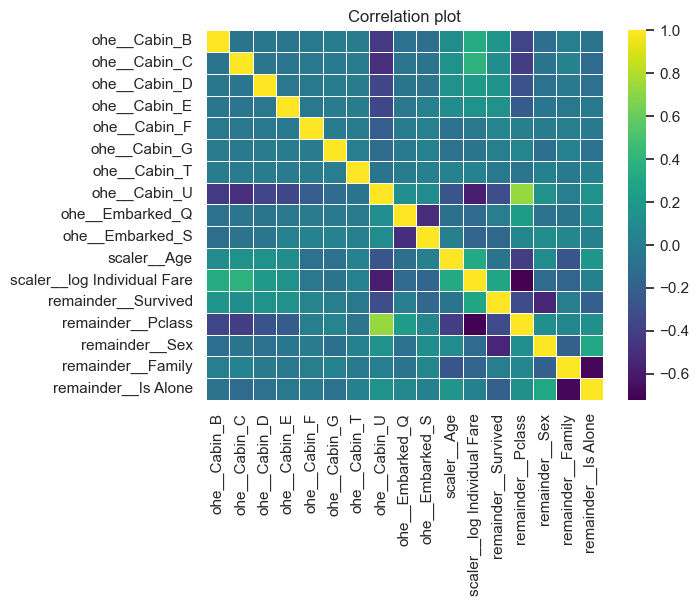

In [92]:
sns.heatmap(corr_mat.corr(), cmap = 'viridis', linewidth = 0.5)
plt.title('Correlation plot')
plt.show()

# Logistic Regression

In [93]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(x_train_trf, y_train)

LogisticRegression()

In [94]:
y_pred_clf = clf.predict(x_test_trf)

In [95]:
from sklearn.metrics import accuracy_score, classification_report

acc_clf = accuracy_score(y_test, y_pred_clf)
print(f'Accuracy Score: {np.round(acc_clf, 6)*100}%')

Accuracy Score: 82.1229%


In [96]:
from sklearn.model_selection import cross_val_score

cvs_clf = cross_val_score(LogisticRegression(), x_train_trf, y_train, scoring = 'accuracy', cv = 5, n_jobs = -1)

print(f'Cross Validation Score: {np.round(cvs_clf.mean()*100, 4)}%')

Cross Validation Score: 79.7715%


In [97]:
print(classification_report(y_test, y_pred_clf))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.76      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



# Decision Tree

In [98]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [99]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train_trf, y_train)

DecisionTreeClassifier()

In [100]:
y_pred_dtc = dtc.predict(x_test_trf)

In [101]:
acc_dtc = accuracy_score(y_test, y_pred_dtc)
print(f'Accuracy Score: {np.round(acc_dtc, 6)*100}%')

Accuracy Score: 81.0056%


In [103]:
cvs_dtc = cross_val_score(DecisionTreeClassifier(), x_train_trf, y_train, scoring = 'accuracy', cv = 5, n_jobs = -1)

print(f'Cross Validation Score: {np.round(cvs_dtc.mean()*100, 4)}%')

Cross Validation Score: 75.5609%


## Feature importance

In [104]:
pd.DataFrame({'Columns': ct.get_feature_names_out(), 'Feature Importance': np.round(dtc.feature_importances_, 4)*100}).sort_values('Feature Importance', ascending = False)

ValueError: All arrays must be of the same length

# SVM

In [105]:
from sklearn.svm import SVC

In [106]:
svc = SVC()
svc.fit(x_train_trf, y_train)

SVC()

In [107]:
y_pred_svc = svc.predict(x_test_trf)

In [111]:
acc_svc = accuracy_score(y_test, y_pred_svc)

print(f'Accuracy Score: {np.round(acc_svc, 6)*100}%')

Accuracy Score: 81.0056%


In [112]:
cvs_svc = cross_val_score(SVC(), x_train_trf, y_train, scoring = 'accuracy', cv = 5, n_jobs = -1)

print(f'Cross Validation Score: {np.round(cvs_svc.mean()*100, 4)}%')

Cross Validation Score: 82.4367%


In [113]:
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       105
           1       0.80      0.72      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



# Random Forest

In [114]:
from sklearn.ensemble import RandomForestClassifier

In [115]:
rfc = RandomForestClassifier()
rfc.fit(x_train_trf, y_train)

RandomForestClassifier()

In [116]:
y_pred_rfc = rfc.predict(x_test_trf)

In [117]:
acc_rfc = accuracy_score(y_test, y_pred_rfc)

print(f'Accuracy Score: {np.round(acc_rfc, 6)*100}%')

Accuracy Score: 81.5642%


In [118]:
cvs_rfc = cross_val_score(RandomForestClassifier(), x_train_trf, y_train, scoring = 'accuracy', cv = 5, n_jobs = -1)

print(f'Cross Validation Score: {np.round(cvs_rfc.mean(), 4)*100}%')

Cross Validation Score: 80.62%


In [119]:
print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.84      0.85      0.84       105
           1       0.78      0.77      0.78        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



# XGBoost

In [120]:
from xgboost import XGBClassifier

In [121]:
xgbc = XGBClassifier()
xgbc.fit(x_train_trf, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [122]:
y_pred_xgbc = xgbc.predict(x_test_trf)

In [123]:
acc_xgbc = accuracy_score(y_test, y_pred_xgbc)

print(f'Accuracy Score: {np.round(acc_xgbc, 6)*100}%')

Accuracy Score: 81.0056%


In [124]:
cvs_xgbc = cross_val_score(XGBClassifier(), x_train_trf, y_train, scoring = 'accuracy', cv = 5, n_jobs = -1)

print(f'Cross Validation Score: {cvs_xgbc.mean()*100}%')

Cross Validation Score: 80.19994090416625%


# Hyperparameter Tuning

In [125]:
acc_data = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree Classifier', 'SVC', 'Random Forect Classifier', 'XGBoost Classifier'],
    'Accuracy': [acc_clf, acc_dtc, acc_svc, acc_rfc, acc_xgbc],
    'Cross Val Score': [cvs_clf.mean(), cvs_dtc.mean(), cvs_svc.mean(), cvs_rfc.mean(), cvs_xgbc.mean()]})

In [126]:
acc_data.sort_values('Accuracy', ascending = False)

,Model,Accuracy,Cross Val Score
0,Logistic Regression,0.821229,0.797715
3,Random Forect Classifier,0.815642,0.806225
1,Decision Tree Classifier,0.810056,0.755609
2,SVC,0.810056,0.824367
4,XGBoost Classifier,0.810056,0.801999


In [127]:
acc_data.sort_values('Cross Val Score', ascending = False)

,Model,Accuracy,Cross Val Score
2,SVC,0.810056,0.824367
3,Random Forect Classifier,0.815642,0.806225
4,XGBoost Classifier,0.810056,0.801999
0,Logistic Regression,0.821229,0.797715
1,Decision Tree Classifier,0.810056,0.755609


## SVM

In [128]:
parameters = {
    'C': [0.2, 0.4, 0.6, 0.8, 1],
    'kernel': ['rbf', 'sigmoid'],
    'gamma': ['scale', 'auto', 0.2, 0.4, 0.6, 0.8, 1]
}

In [129]:
from sklearn.model_selection import GridSearchCV

gscv = GridSearchCV(SVC(), param_grid = parameters, n_jobs = -1, cv = 5, scoring = 'accuracy')
gscv.fit(x_train_trf, y_train)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.2, 0.4, 0.6, 0.8, 1],
                         'gamma': ['scale', 'auto', 0.2, 0.4, 0.6, 0.8, 1],
                         'kernel': ['rbf', 'sigmoid']},
             scoring='accuracy')

In [130]:
gscv.best_score_*100

np.float64(82.57854821235104)

In [131]:
gscv.best_params_

{'C': 0.4, 'gamma': 0.2, 'kernel': 'rbf'}

In [132]:
svc = SVC(C = gscv.best_params_['C'], kernel = gscv.best_params_['kernel'], gamma = gscv.best_params_['gamma'])
svc.fit(x_train_trf, y_train)

SVC(C=0.4, gamma=0.2)

In [133]:
y_pred = svc.predict(x_test_trf)

In [134]:
acc = accuracy_score(y_test, y_pred)
print(f'Accuracy Score: {np.round(acc, 6)*100}%')

Accuracy Score: 81.0056%


In [135]:
cvs = cross_val_score(svc, x_train_trf, y_train, scoring = 'accuracy', cv = 5)
print(f'Cross Val Score: {np.round(cvs.mean(), 6)*100}%')

Cross Val Score: 82.5785%


## XGBoost Classifier

In [136]:
parameters = {
    'n_estimators': [180, 200, 220, 240, 260],
    'max_depth': [20, 40, 60],
    'max_leaves': [4, 6, 8, 10],
    'learning_rate': [0.04, 0.05, 0.07, 1]
}

In [137]:
gscv = GridSearchCV(XGBClassifier(), param_grid = parameters, n_jobs = -1, cv = 5, scoring = 'accuracy')
gscv.fit(x_train_trf, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.04, 0.05, 0.07, 1],
                         'max_depth': [20, 40, 60], 'max_leaves': [4, 6, 8, 10],
                         'n_estimators': [180, 200, 220, 240, 260]},
             scoring='accuracy')

In [138]:
gscv.best_score_*100

np.float64(83.42558849601104)

In [139]:
gscv.best_params_

{'learning_rate': 0.05, 'max_depth': 20, 'max_leaves': 6, 'n_estimators': 220}

In [140]:
xgbc = XGBClassifier(
    n_estimators = gscv.best_params_['n_estimators'],
    max_depth = gscv.best_params_['n_estimators'],
    learning_rate = gscv.best_params_['learning_rate'],
    max_leaves = gscv.best_params_['max_leaves'])
xgbc.fit(x_train_trf, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=220, max_leaves=6,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=220, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [141]:
y_pred = xgbc.predict(x_test_trf)

In [142]:
acc = accuracy_score(y_test, y_pred)
print(f'Accuracy Score: {np.round(acc, 6)*100}%')

Accuracy Score: 83.7989%


In [143]:
cvs = cross_val_score(xgbc, x_train_trf, y_train, scoring = 'accuracy', cv = 5)
print(f'Cross Val Score: {np.round(cvs.mean(), 6)*100}%')

Cross Val Score: 83.4256%


## Random Forest Classifier

In [144]:
parameters = {
    'n_estimators': [150, 200, 250, 300],
    'criterion': ['gini', 'log_loss'],
    'min_samples_split': [2, 4, 6, 8],
    'min_samples_leaf': [2, 4, 6, 8],
    'max_depth': [40, 60, 80],
    'bootstrap': [True, False]
}

In [145]:
gscv = GridSearchCV(RandomForestClassifier(), param_grid = parameters, n_jobs = -1, cv = 5, scoring = 'accuracy')
gscv.fit(x_train_trf, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'log_loss'],
                         'max_depth': [40, 60, 80],
                         'min_samples_leaf': [2, 4, 6, 8],
                         'min_samples_split': [2, 4, 6, 8],
                         'n_estimators': [150, 200, 250, 300]},
             scoring='accuracy')

In [146]:
gscv.best_score_*100

np.float64(83.56741849699596)

In [147]:
gscv.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 40,
 'min_samples_leaf': 6,
 'min_samples_split': 2,
 'n_estimators': 300}

In [148]:
rfc = RandomForestClassifier(
    n_estimators = gscv.best_params_['n_estimators'],
    criterion = gscv.best_params_['criterion'],
    min_samples_split = gscv.best_params_['min_samples_split'],
    min_samples_leaf = gscv.best_params_['min_samples_leaf'],
    max_depth = gscv.best_params_['max_depth'],
    bootstrap = gscv.best_params_['bootstrap'])
rfc.fit(x_train_trf, y_train)

RandomForestClassifier(max_depth=40, min_samples_leaf=6, n_estimators=300)

In [149]:
y_pred = rfc.predict(x_test_trf)

In [150]:
acc = accuracy_score(y_test, y_pred)
print(f'Accuracy Score: {np.round(acc, 6)*100}%')

Accuracy Score: 82.6816%


In [151]:
cvs = cross_val_score(rfc, x_train_trf, y_train, scoring = 'accuracy', cv = 5)
print(f'Cross Val Score: {np.round(cvs.mean(), 6)*100}%')

Cross Val Score: 83.006%
